In [1]:
using DSP
using FFTW
using Plots
using SignalAnalysis
using Unitful

const s=u"s"
const μs=u"μs"
const MHz=u"MHz"
const kHz=u"kHz"
const Hz=u"Hz"

Hz

### Delay-only Model

In [2]:
function plot_waveform(y, t, n_xticklabels=5)
    spacing = floor(Int64, length(t)/n_xticklabels)
    plot(
        real.(y),
        xticks=([1:spacing:length(t);], round.(μs, t[1:spacing:length(t)], digits=2)),
        # xrotation=20,
        size=(500,300),
    )
end

plot_waveform (generic function with 2 methods)

In [3]:
# system parameters
t₀ = 0s
fz = 10MHz
sr = 1/(100*fz)
ϕ = π/4
t = [0μs:sr:5μs;]
size(t)

(5001,)

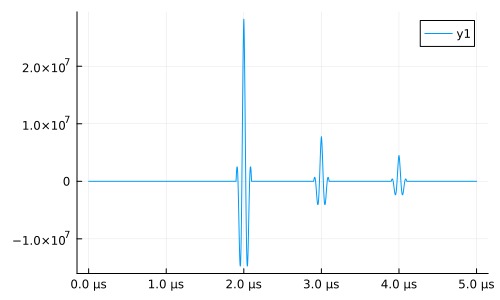

In [4]:
# nascent delta
η(t,ϵ)=max(1-abs(ustrip(t))/ϵ, 0)/ϵ
# signal
x(t) = η(t,1e-7) * exp(2im*π*fz*t + ϕ)

# model parameters
τ = [2μs 2μs 3μs 4μs;]
h = [1/√2 1/√3 1/√8 1/√24;]

y(t) = sum(h .* x.(t.-τ), dims=2)
plot_waveform(y(t), t)

# Errata

In [ ]:
t₀ = 0s
t₁ = 1s
fz = 10kHz
t = [t₀:1/(2*fz):t₁-1/(2*fz);]
size(t)

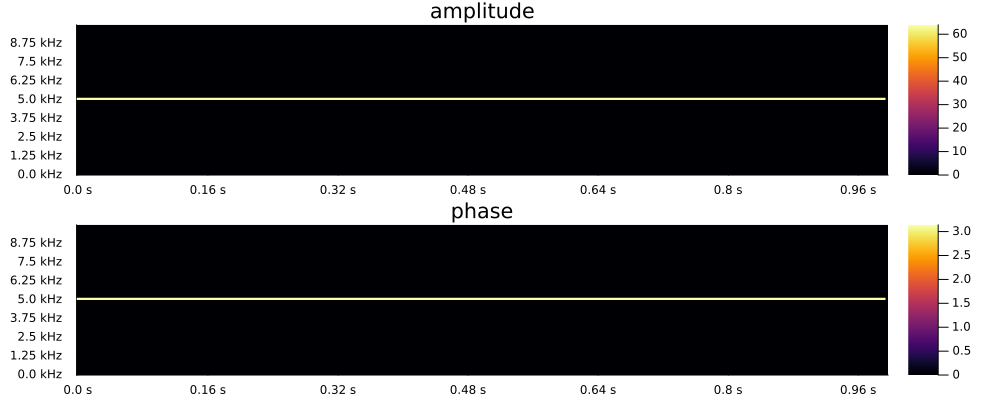

In [132]:
function dilated_fft(x, fft_pts)
    s = Int(floor(length(x)/fft_pts))
    X = zeros(Complex{Float64}, s, fft_pts)
    for i in 1:s-1
        X[i,:] = fft(x[i*fft_pts:(i+1)*fft_pts-1])
    end
    return X
end

function plot_spectrogram(x, fft_pts=64)
    dfft = transpose(dilated_fft(x, fft_pts))
    yticks = ([1:8:64;], [0:8/64:1;].*fz)
    xticks = ([1:50:2*(t₁-t₀)*fz/fft_pts;], [t₀:fft_pts*50/(2*fz):t₁-1/(2*fz);])
    p1=heatmap(
        abs.(dfft),
        yticks=yticks,
        xticks=xticks,
        title="amplitude",
    )
    p2=heatmap(
        min.(5, round.(abs.(dfft))) ./5 .* mod2pi.(angle.(dfft)),
        yticks=yticks,
        xticks=xticks,
        title="phase",
    )
    plot(p1,p2,layout=(2,1),size=(1000,400))
end

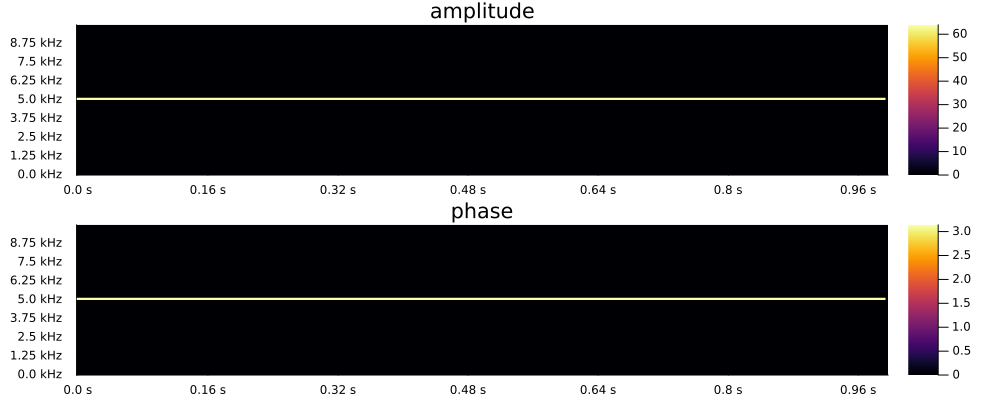

In [137]:
# parameters
τ₁ = 2μs
τ₂ = 2μs
τ₃ = 3μs
τ₄ = 4μs

ν₁ = 0
ν₂ = -950Hz
ν₃ = 0
ν₄ = 750Hz

h₁ = 1/√2
h₂ = 1/√3
h₃ = 1/√8
h₄ = 1/√24

# signal
x(t) = exp.(2im*π*fz*t)
plot_spectrogram(x(t))

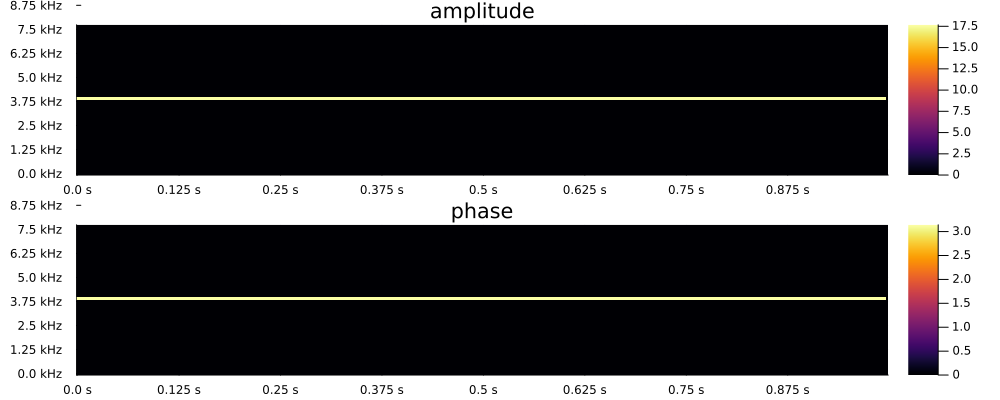

In [134]:
h(t) = h₃
plot_spectrogram(h(t).*x(t), 50)

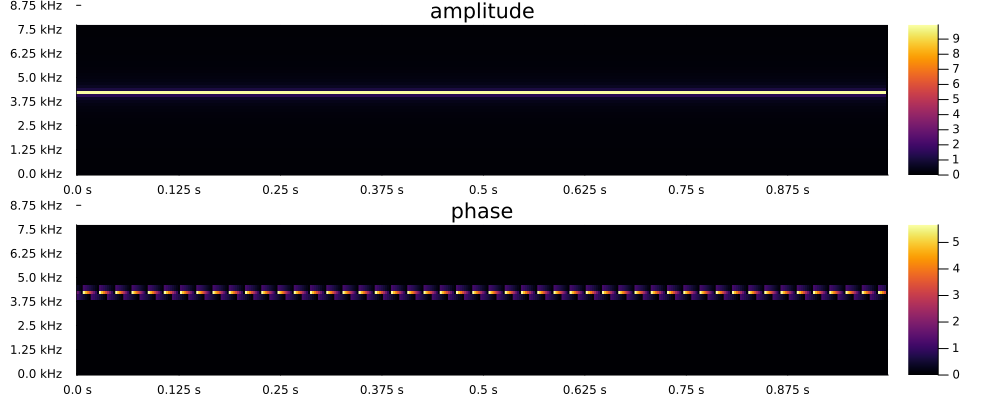

In [135]:
h(t) = h₄*exp.(2im*π*ν₄*t)
plot_spectrogram(h(t).*x(t), 50)

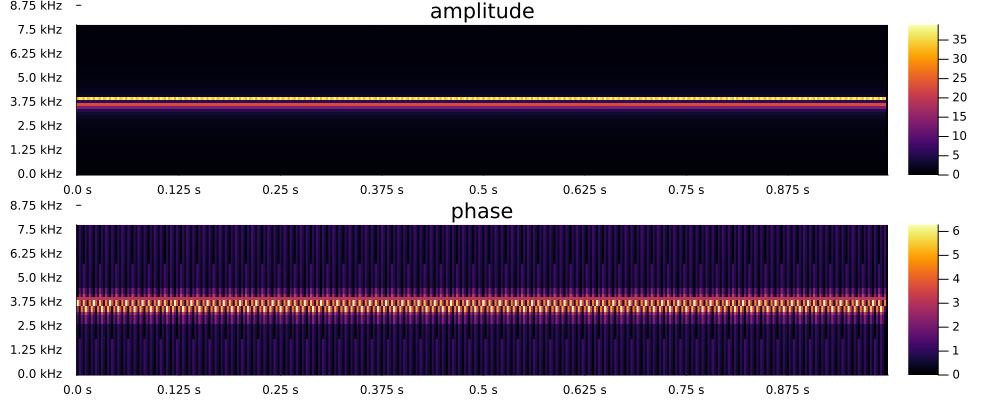

In [136]:
# h(t) = h₁.+h₂*exp.(2im*π*ν₂*t)
plot_spectrogram(h(t).*x(t), 50)